In [974]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [975]:
original_df = pd.read_csv(
    '/home/mwawaka/PycharmProjects/pythonProject1/CAT/data/NSE_data_all_stocks_2022_jan_to_may.csv')

df = original_df.copy()
df.rename(columns={'12m Low': '12mth Low', '12m High': '12mth High', 'Day Price': 'Close Price',
                   'Previous': 'Previous Close Price', 'Change': 'Change Close Price'}, inplace=True)


In [976]:
#convert the date column from type object to type Date
df['Date'] = pd.DatetimeIndex(df['Date'])
df.set_index('Date', inplace=True)

df['Close Price'] = pd.to_numeric(df['Close Price'], errors="coerce")

# Filling the null values with estimate values based on existing data 
df['Close Price'].interpolate(inplace=True)

df['Close Price'].isna().sum()

0

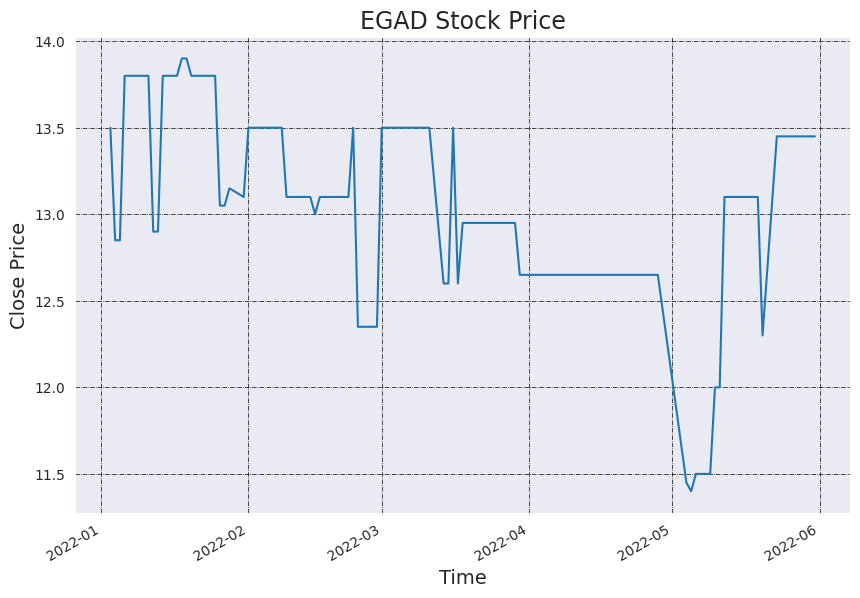

In [977]:
# Time series for Stocks for different companies
random_value = int(random.uniform(0, 10))
companies = ['ABSA', 'EQTY', 'BRIT', 'NCBA', 'EGAD', 'BAMB', 'CRWN', 'KPLC-P4', 'TPSE', 'DTK','UCHM']
company_code = companies[random_value]
company_df = df.loc[df['Code'] == company_code]

# Plotting the data
company_df['Close Price'].plot(figsize=(10, 7))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [978]:
company_df

,Code,Name,12mth Low,12mth High,Day Low,Day High,Close Price,Previous Close Price,Change Close Price,Change%,Volume,Adjusted Price
Date,,,,,,,,,,,,
2022-01-03,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.50,13.5,-,-,"4,000",-
2022-01-04,EGAD,Eaagads Ltd,10,15,12.85,12.85,12.85,13.5,-0.65,4.81%,600,-
2022-01-05,EGAD,Eaagads Ltd,10,15,12.85,12.85,12.85,12.85,-,-,-,-
2022-01-06,EGAD,Eaagads Ltd,10,15,13.8,13.8,13.80,12.85,0.95,7.39%,100,-
2022-01-07,EGAD,Eaagads Ltd,10,15,13.8,13.8,13.80,13.8,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,EGAD,Eaagads Ltd,10,15,13.45,13.45,13.45,13.45,-,-,-,-
2022-05-26,EGAD,Eaagads Ltd,10,15,13.45,13.45,13.45,13.45,-,-,-,-
2022-05-27,EGAD,Eaagads Ltd,10,15,13.45,13.45,13.45,13.45,-,-,-,-


In [979]:
#Using Close price and Exponential Moving Averages
new_df = company_df[['Close Price']]
ema_df = new_df.copy()
# Adding technical indicators
import pandas_ta as ta

# Exponential Moving Averages
ema_df['EMA'] = ta.ema(ema_df['Close Price'], length=5)
ema_df

,Close Price,EMA
Date,,
2022-01-03,13.50,NaN
2022-01-04,12.85,NaN
2022-01-05,12.85,NaN
2022-01-06,13.80,NaN
2022-01-07,13.80,13.360000
...,...,...
2022-05-25,13.45,13.245953
2022-05-26,13.45,13.313969
2022-05-27,13.45,13.359313


# Exponential Moving Average

- The average is calculated over a 5 day period
- the first 4 entries in our data will have a NaN value since there were not proceeding values from which the EMA could be calculated.
- Will drop the rows with NaN values

In [980]:
# Dropping the null values
ema_df.dropna(subset=['EMA'], inplace=True)


- First, let’s take a quick look at a plot of our data now to get an idea of how the EMA value tracks with the adjusted closing price.
- We can see here the EMA tracks nicely.

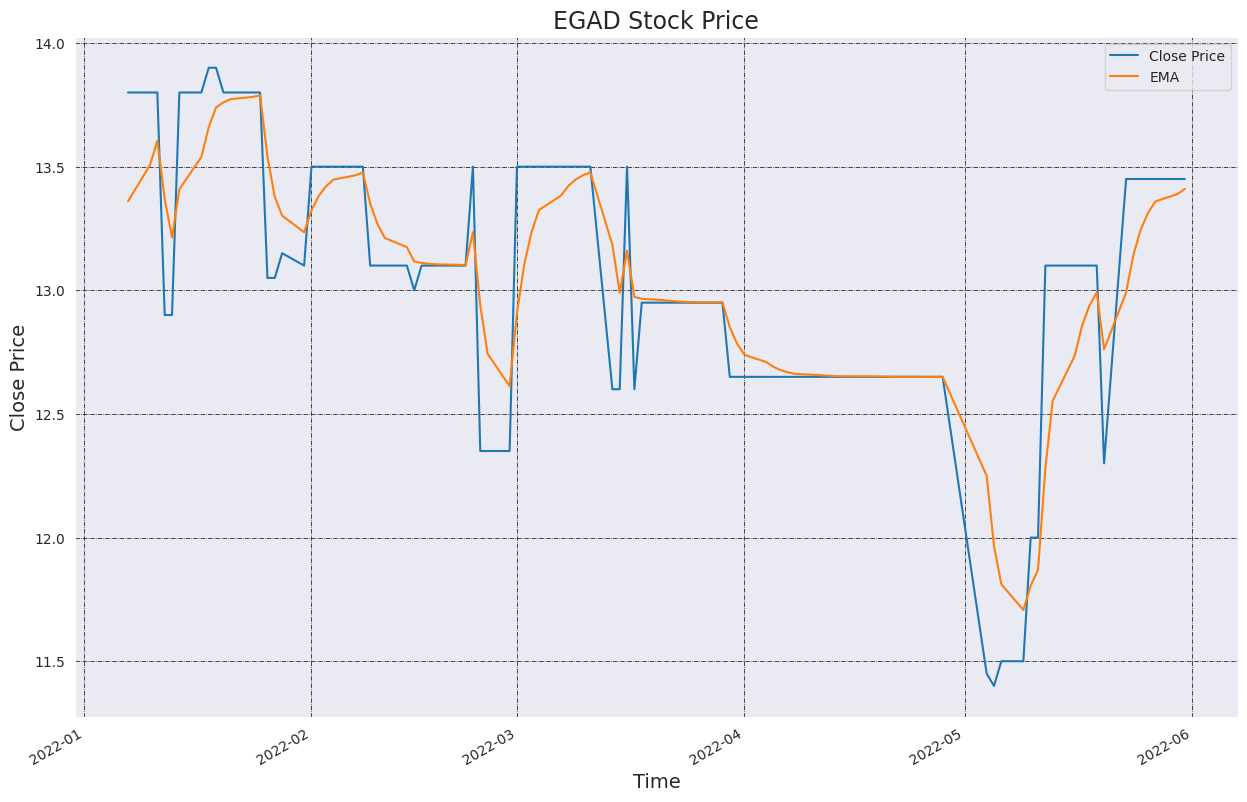

In [981]:
# Visualizations
ema_df[['Close Price', 'EMA']].plot(figsize=(15, 10))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Train and Test Split

In [982]:
# Train and Test split
feature = ema_df[['Close Price']]
target = ema_df[['EMA']]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)

# Model Selection and Training

In [983]:
# Model Selection and Training

# Create the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Making predictions
y_pred = lin_reg.predict(X_test)

# Validating the model

In [984]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# 
# # Printout relevant metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R_Squared", r2_score(y_test, y_pred))
print(f'Company Name:{company_df.Name.iloc[0]}')
print(f'Company Code:{company_code}')

Mean Squared Error: 0.03641282797099708
Root Mean Squared Error: 0.19082145574069254
Mean Absolute Error: 0.15598710778893032
R_Squared 0.8751334250120533
Company Name:Eaagads Ltd
Company Code:EGAD


- The R-squared score ranges from 0 to 1, where 1 indicates a perfect prediction, and 0 indicates that the model's predictions are no better than simply predicting the mean of the true values.

In [1043]:
from sklearn.model_selection import KFold


# Validation 2
def rms_error(actual, predicted):
    # lesser values are better (a < b means a is better)
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)


def neg_rmse_score(actual, predicted):
    # greater values are better (a < b means b better)
    return -rms_error(actual, predicted)


def neg_rmse_scorer(mod, ftrs, tgt_actual):
    tgt_pred = mod.predict(ftrs)
    return neg_rmse_score(tgt_actual, tgt_pred)


scores = cross_val_score(lin_reg, feature, target, cv=KFold(10, shuffle=True), scoring=neg_rmse_scorer)

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores

Mean score of -0.20 with a standard deviation of 0.06


array([-0.22419832, -0.30755095, -0.26594907, -0.09881879, -0.23003835,
       -0.18413258, -0.17381508, -0.12149965, -0.25812181, -0.13656701])

# Visualization Prediction vs Actual

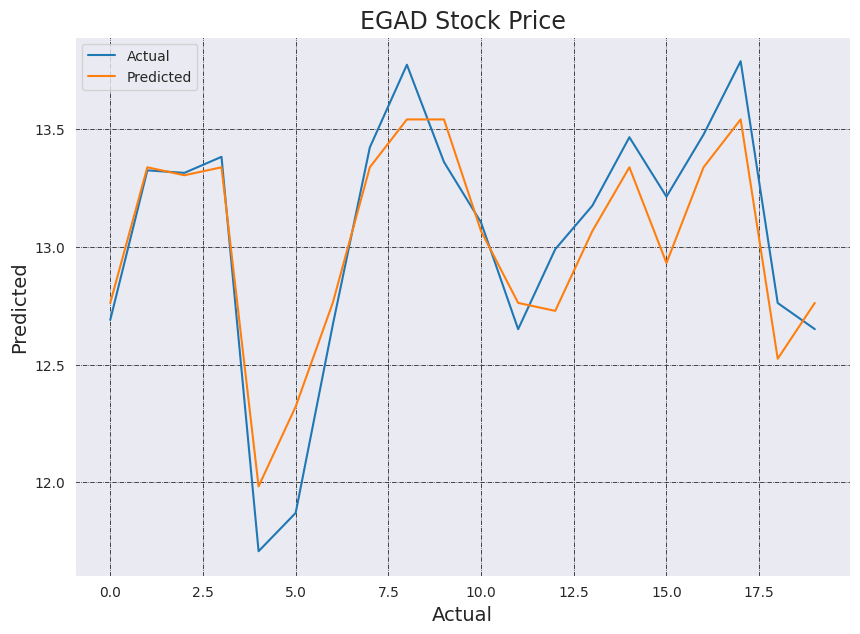

,Actual,Predicted
0,12.689625,12.761826
1,13.324623,13.337685
2,13.313969,13.303811
3,13.382081,13.337685
4,11.707425,11.982724
5,11.869967,12.321464
6,12.667611,12.761826
7,13.422054,13.337685
8,13.773165,13.540929
9,13.360000,13.540929


In [986]:
results = pd.DataFrame({
    "Actual": y_test.EMA.values,
    "Predicted": y_pred.flatten()
})

results[['Actual', 'Predicted']].plot(figsize=(10, 7))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Predicted', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
results

# Cross Validation
##### Cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.
##### The process that cross_val_score uses is typical for cross validation and follows these steps:

1. The number of folds is defined, by default this is 5
2. The dataset is split up according to these folds, where each fold has a unique set of testing data
3. A model is trained and tested for each fold
4. Each fold returns a metric for it's test data
5. The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process

- Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.

- The typical process of model development is to train a model on one fold of data and then test on another. But how do we know that this single test dataset is representative? This is why we use cross_val_score and cross validation more generally, to train and test our model on multiple folds such that we can be sure out model generalises well across the whole dataset and not just a single portion.

- If we see that the metrics for all folds in cross_val_score are uniform then it can be concluded that the model is able to generalise, however if there are significant differences between them then this may indicate over-fitting to certain folds and would need to be investigated further.

# How many folds should I use in cross_val_score?
- By default cross_val_score uses a 5-fold strategy, however this can be adjusted in the cv parameter.
- There is unfortunately no hard and fast rules when it comes to how many folds you should choose. A general rule of thumb though is that the number of folds should be as large as possible such that each split has enough observations to generalise from and be tested on.

# Can I train my model using cross_val_score?
- A common question developers have is whether cross_val_score can also function as a way of training the final model. Unfortunately this is not the case. Cross_val_score is a way of assessing a model and it’s parameters, and cannot be used for final training. Final training should take place on all available data and tested using a set of data that has been held back from the start.

# Which metrics can I use in cross_val_score
By default cross_val_score uses the chosen model’s default scoring metric, but this can be overridden with your metric of choice in the scoring parameter.

The common metrics provided by sklearn are passable as a string into this parameter, where some typical choices would be:

- ‘accuracy’
- ‘balanced_accuracy’
- ‘roc_auc’
- ‘f1’
- ‘neg_mean_absolute_error’
- ‘neg_root_mean_squared_error’
- ‘r2’

# Function parameters for cross_val_score
There are a number of parameters that you should be aware of when using this function. They are:

- estimator - The model object to use to fit the data
- X - The data to fit the model on
- y - The target of the model
- scoring - The error metric to use
- cv - The number of splits to use